# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [35]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [36]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [37]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p> 
Q1 This problem can be approach with an A/B test.  In this case we want to compare the fraction of people who received a call for the white sounding names and compare how that changed when the name was black sounding.

Q2 The null hypothesis is that the difference in the fraction of resumes receiving a call between white and black sounding names is 0.  In other words, there is not difference between the fraction white and black sounding names who received an call.  The alternative hypothesis is that the there is a difference in the fraction of resumes receiving calls between white and black sounding names.
</div> 

In [38]:
w = data[data.race=='w']
b = data[data.race=='b']

In [ ]:
# Your solution to Q3 here

# Frequentist method

In [43]:
#Using frequentist statistics we can calculate each of the need statistical values
frac_w = np.sum(w.call)/len(w.call)
frac_b = np.sum(b.call)/len(b.call)

p_hat = (np.sum(w.call)+np.sum(b.call))/(len(w.call)+len(b.call))
sigma_wb = np.sqrt(p_hat*(1-p_hat)*(1/len(w.call)+1/len(b.call)))
mu_wb = frac_w - frac_b

t_95 = stats.t.ppf(0.975, df = min([len(w.call), len(b.call)])-1)
fs_conf = mu_wb + np.array([-sigma_wb*t_95, sigma_wb*t_95])

T = mu_wb/sigma_wb
fs_p = 1-stats.t.cdf(T,df = min([len(w.call), len(b.call)])-1)

print('The standard deviation is', sigma_wb)
print('The 95% confidence interval is', fs_conf)
print('The p-value is', fs_p*2)

print('The 95% confidence in terms of percentage increase in call rate from black to white names')
print(fs_conf/frac_b*100)

The standard deviation is 0.007796894036170457
The 95% confidence interval is [0.01674362 0.04732209]
The p-value is 4.115550211780672e-05
The 95% confidence in terms of percentage increase in call rate from black to white names
[25.96860783 73.39444949]


## Bootstrap method

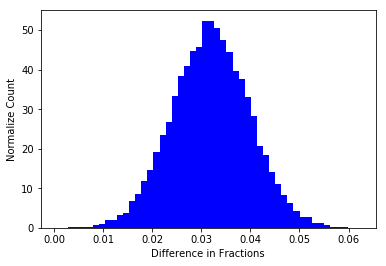

The standard deviation is 0.007837868036531234
The 95% confidence interval is [0.0164271  0.04722793]
The p-value is 0.0
From the data, the fraction of white names and black names getting calls is : 
0.09650924024640657 0.06447638603696099


In [41]:
#Function to calculate a bootstrap sample of the fractional difference between
#white and black sounding names
def bs_frac(data1, data2, size = 1):
    frac_diff = np.empty(size)
    
    for index in range(size):
        temp1 = np.random.choice(data1, size = len(data1))
        temp2 = np.random.choice(data2, size = len(data2))
        frac1 = np.sum(temp1)/len(temp1)
        frac2 = np.sum(temp2)/len(temp2)
        
        frac_diff[index] = frac1 - frac2
    return frac_diff

bs_diff_frac = bs_frac(w.call, b.call, 20000)

plt.hist(bs_diff_frac, color = 'blue', density = True, bins = 50)
plt.xlabel('Difference in Fractions')
plt.ylabel('Normalize Count')
plt.show()

bs_p = np.sum(bs_diff_frac <= 0)/len(bs_diff_frac)
bs_conf = np.percentile(bs_diff_frac, [2.5, 97.5])
bs_sigma = np.std(bs_diff_frac)

print('The standard deviation is', bs_sigma)
print('The 95% confidence interval is', bs_conf)
print('The p-value is', bs_p)
print('From the data, the fraction of white names and black names getting calls is : ')
print(frac_w, frac_b)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
Q4 We see that there is a p-value << 0.05 when we test the null hypothesis that there is not difference between the fraction of resumes that get calls between white and black sounding names.  The value of 0 is not contained in the 95% confidence interval for the difference between the fractions.  Hence, this confirms that there is a statistically significant difference between the fraction of calls received from white and black sounding resumes.
Q5 There is a statistical significant difference between callbacks between white and black sounding names.  More specifically, white sounding names get a slightly higher fractional call rate than black sounding names.  The fractional difference is a significant portion of the total fraction call rate.  Based on the analysis, the 95% confidence is that a white person has a 26%-73% greater call frequency than a black person.  To determine the most important factors in calls the remaining variables in the data can be correlated with the call frequency.  
</div>